In [1]:
from dataset import CamVid

In [2]:
data_transform = transforms.Compose([
    
dataset=CamVid(root_dir='CamVid', mode='train')

In [5]:
for img, label in dataset:
    print(img.size, label.size)
    break

(480, 360) (480, 360)


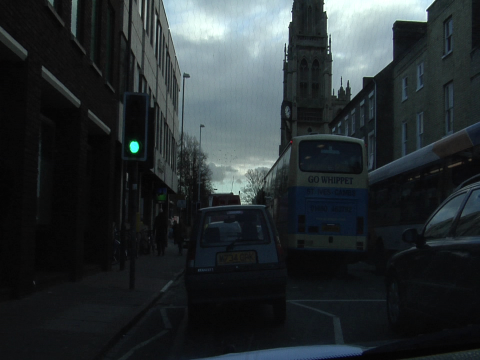

In [6]:
img

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

In [26]:
torchvision.transforms.ToTensor()(img).shape

torch.Size([3, 360, 480])

In [1]:
from dataset import get_dataloaders
train_loader, val_loader, test_loader=get_dataloaders()

In [2]:
for i,j in train_loader:
    print(i.shape, j.shape)
    break

torch.Size([8, 3, 720, 960]) torch.Size([8, 1, 720, 960])


In [6]:
j

tensor([[[[ 1,  1,  1,  ...,  0,  0,  0],
          [ 1,  1,  1,  ...,  0,  0,  0],
          [ 1,  1,  1,  ...,  0,  0,  0],
          ...,
          [ 4,  4,  4,  ..., 11, 11, 11],
          [ 4,  4,  4,  ..., 11, 11, 11],
          [ 4,  4,  4,  ..., 11, 11, 11]]],


        [[[ 0,  0,  0,  ...,  5,  5,  5],
          [ 0,  0,  0,  ...,  5,  5,  5],
          [ 0,  0,  0,  ...,  5,  5,  5],
          ...,
          [ 3,  3,  3,  ...,  3,  3,  3],
          [ 3,  3,  3,  ...,  3,  3,  3],
          [ 3,  3,  3,  ...,  3,  3,  3]]],


        [[[ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          [ 0,  0,  0,  ...,  0,  0,  0],
          ...,
          [ 3,  3,  3,  ...,  3,  3,  3],
          [ 3,  3,  3,  ...,  3,  3,  3],
          [ 3,  3,  3,  ...,  3,  3,  3]]],


        ...,


        [[[ 1,  1,  1,  ...,  1,  1,  1],
          [ 1,  1,  1,  ...,  1,  1,  1],
          [ 1,  1,  1,  ...,  1,  1,  1],
          ...,
          [ 3,  3,  3,  ...,  3

In [5]:
tmp.shape

torch.Size([3, 720, 960])

In [67]:
from PIL import Image
a=Image.open('0001TP_008550_0.png')
b=Image.open('0001TP_008550_1.png')
c=Image.open('0001TP_008550_2.png')

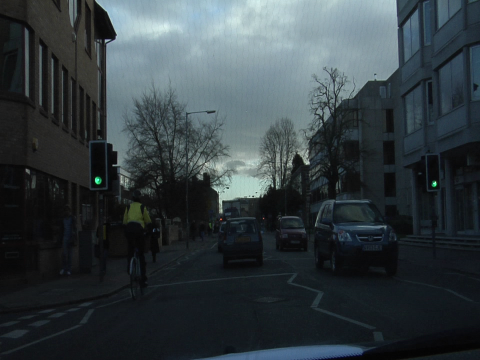

In [68]:
a

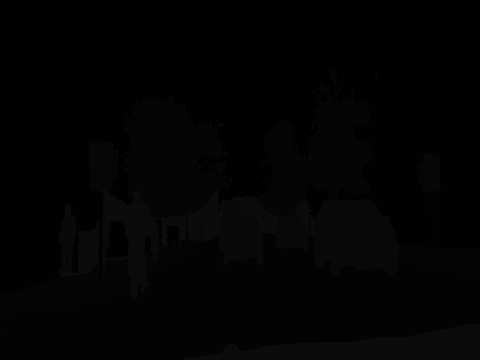

In [69]:
b

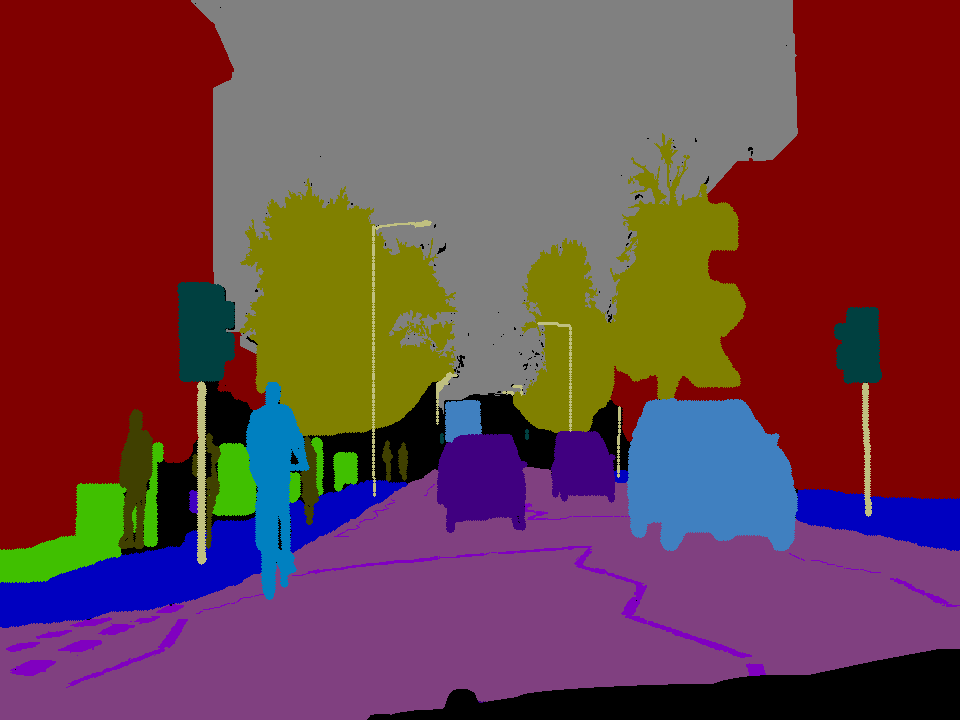

In [70]:
c

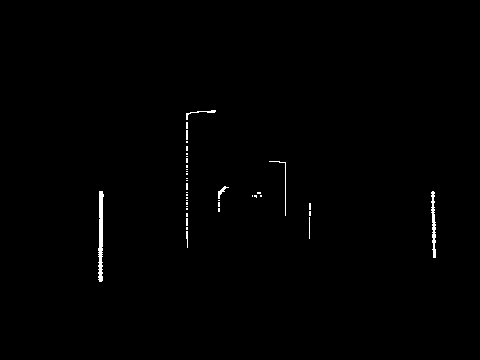

In [89]:
Image.fromarray(np.array(b)==2)

In [95]:
color_encoding = [
    ('Bicyclist', (0,128, 192)),
    ('Building', (128, 0, 0)),
    ('Car', (64, 0, 128)),
    ('Column_Pole', (192, 192, 128)),
    ('Fence', (64, 64, 128)),
    ('Pedestrian', (64, 64, 0)),
    ('Road', (128, 64, 128)),
    ('Sidewalk', (0, 0, 192)),
    ('SignSymbol', (192, 128, 128)),
    ('Sky', (128, 128, 128)),
    ('Tree', (128, 128, 0)),
]

num_classes=len(color_encoding)

def process_one_img(img,color_encoding):
    img=np.array(img).transpose(1, 2, 0)
    print(img.shape)
    label=np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(num_classes):
                print(img[i,j,:])
                if (img[i,j,:]==color_encoding[k][1]).all():
                    label[i,j]=k
    return label

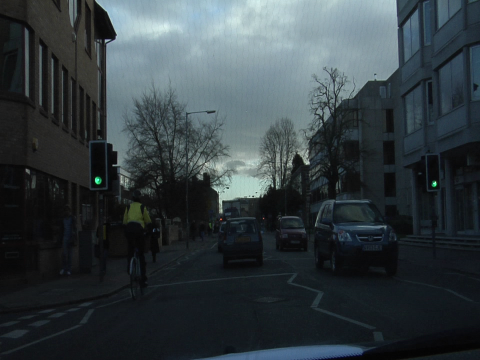

In [96]:
process_one_img(c,color_encoding)

(960, 3, 720)
[128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128 128
 128 128 128 128 128 128 128 128 128 

C:\Users\CYC\AppData\Local\Temp\ipykernel_21772\3382748905.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if (img[i,j,:]==color_encoding[k][1]).all():


AttributeError: 'bool' object has no attribute 'all'

In [32]:
from PIL import Image
from torchvision import transforms
img=Image.open('0001TP_008610_L.png')

In [40]:
a=transforms.PILToTensor()(img)

In [42]:
from collections import OrderedDict

In [52]:
color_encoding = OrderedDict([
    ('Bicyclist', (0,128, 192)),
    ('Building', (128, 0, 0)),
    ('Car', (64, 0, 128)),
    ('Column_Pole', (192, 192, 128)),
    ('Fence', (64, 64, 128)),
    ('Pedestrian', (64, 64, 0)),
    ('Road', (128, 64, 128)),
    ('Sidewalk', (0, 0, 192)),
    ('SignSymbol', (192, 128, 128)),
    ('Sky', (128, 128, 128)),
    ('Tree', (128, 128, 0)),
])
for k,v in color_encoding.items():
    print(k,v)

Bicyclist (0, 128, 192)
Building (128, 0, 0)
Car (64, 0, 128)
Column_Pole (192, 192, 128)
Fence (64, 64, 128)
Pedestrian (64, 64, 0)
Road (128, 64, 128)
Sidewalk (0, 0, 192)
SignSymbol (192, 128, 128)
Sky (128, 128, 128)
Tree (128, 128, 0)


In [54]:
color_encoding = dict([
    ('Bicyclist', (0,128, 192)),
    ('Building', (128, 0, 0)),
    ('Car', (64, 0, 128)),
    ('Column_Pole', (192, 192, 128)),
    ('Fence', (64, 64, 128)),
    ('Pedestrian', (64, 64, 0)),
    
    ('Sidewalk', (0, 0, 192)),
    ('Road', (128, 64, 128)),
    ('SignSymbol', (192, 128, 128)),
    ('Sky', (128, 128, 128)),
    ('Tree', (128, 128, 0)),
])
for k,v in color_encoding.items():
    print(k,v)

Bicyclist (0, 128, 192)
Building (128, 0, 0)
Car (64, 0, 128)
Column_Pole (192, 192, 128)
Fence (64, 64, 128)
Pedestrian (64, 64, 0)
Sidewalk (0, 0, 192)
Road (128, 64, 128)
SignSymbol (192, 128, 128)
Sky (128, 128, 128)
Tree (128, 128, 0)


In [33]:
trans=transforms.ToTensor()

In [35]:
trans(np.array(img))

tensor([[[0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         [0.5020, 0.5020, 0.5020,  ..., 0.5020, 0.5020, 0.5020],
         ...,
         [0.5020, 0.5020, 0.5020,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.5020, 0.5020, 0.5020,  ..., 0.0000, 0.0000, 0.0000],
         [0.5020, 0.5020, 0.5020,  ..., 0.0000, 0.0000, 0.0000],
         [0.5020, 0.5020, 0.5020,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.5020, 0.5020, 0.5020,  ..., 0.0000, 0.0000, 0.0000],
         [0.5020, 0.5020, 0.5020,  ..., 0.0000, 0.0000, 0.0000],
         [0.5020, 0.5020, 0.5020,  ..., 0.0000, 0.0000, 0.

In [7]:
import torch
import numpy as np
from PIL import Image
from collections import OrderedDict
from torchvision.transforms import ToPILImage


class PILToLongTensor(object):
    """Converts a ``PIL Image`` to a ``torch.LongTensor``.

    Code adapted from: http://pytorch.org/docs/master/torchvision/transforms.html?highlight=totensor

    """

    def __call__(self, pic):
        """Performs the conversion from a ``PIL Image`` to a ``torch.LongTensor``.

        Keyword arguments:
        - pic (``PIL.Image``): the image to convert to ``torch.LongTensor``

        Returns:
        A ``torch.LongTensor``.

        """
        if not isinstance(pic, Image.Image):
            raise TypeError("pic should be PIL Image. Got {}".format(
                type(pic)))

        # handle numpy array
        if isinstance(pic, np.ndarray):
            img = torch.from_numpy(pic.transpose((2, 0, 1)))
            # backward compatibility
            return img.long()

        # Convert PIL image to ByteTensor
        img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))

        # Reshape tensor
        nchannel = len(pic.mode)
        img = img.view(pic.size[1], pic.size[0], nchannel)

        # Convert to long and squeeze the channels
        return img.transpose(0, 1).transpose(0,
                                             2).contiguous().long().squeeze_()


In [9]:
transform = PILToLongTensor()
transform(img).shape

torch.Size([3, 720, 960])